# Pymaceuticals Inc.
---

### Analysis

Key Insights: 

This experiment compares the effectiveness of our companies drug of interest (Capomulin) against other drugs in terms of the reduction of tumor sizes.Upon concluding this experiment and analyzing the results, here are my top insights:


Weight vs Tumor Size:
A resulting .834 correlation value of the mice involved concludes that there is a strong  and positive correlation between Weight vs Tumor Size meaning that overall, larger mice had larger tumors. Due to this, we can use this information to understand and potentially predict how tumor volume may change with changes in mouse weight.

Capomulin VS Other Drugs
Data shows that the drug Ramicane performed similarly to our drug of interest. While Capomilin performed better between the two, it was only a slight lead. These results are promising and indicate that an interest should be made on Ramicane as well as Capomulin. However, it is worth noting that in comparison to these two drugs, the remaining drugs had a lower amount of observed data points with Proviva being the lowest. A case could be made to push for more experiments with a closer value of observed points per each mouse. 











Regenerate


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import pearsonr
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
new_order = ['Mouse ID',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)']
# Display the data table for preview
data = data[new_order]
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
len(data["Mouse ID"].unique())

249

In [3]:
# dupes = data.duplicated(subset=['Mouse ID', 'Timepoint'])
# data[dupes]

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = data.duplicated(subset=['Mouse ID', 'Timepoint'])
dupe_id = np.array(data[dupes]["Mouse ID"].unique())
dupe_id


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
data[data["Mouse ID"] == dupe_id[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = data[data["Mouse ID"]!= dupe_id[0]]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [7]:
# Checking the number of mice in the clean DataFrame.
len(df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_grp = df.groupby('Drug Regimen')

mean = df_grp['Tumor Volume (mm3)'].mean()
median = df_grp['Tumor Volume (mm3)'].median()
variance = df_grp['Tumor Volume (mm3)'].var()
std_dev = df_grp['Tumor Volume (mm3)'].std()
sem = df_grp['Tumor Volume (mm3)'].sem()


stat_summary = pd.DataFrame({"Mean Tumor Volume":mean,
                             "Median Tumor Volume": median,
                             "Tumor Volume Variance": variance,
                             "Tumor Volume Std. Dev.": std_dev,
                             "Tumor Volume Std. Err.": sem})
stat_summary

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

adv_stats =   df_grp.agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']})

adv_stats



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

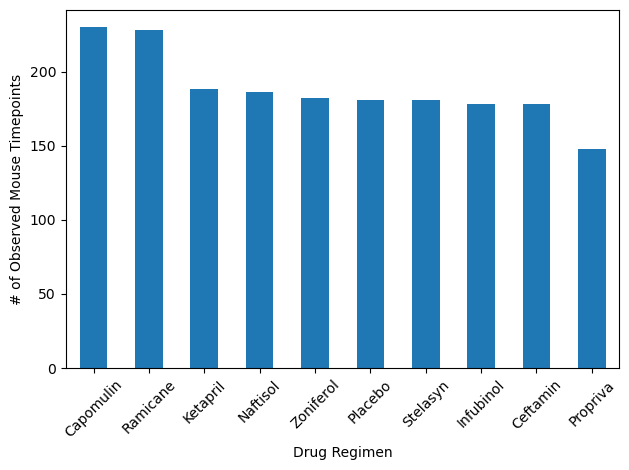

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df['Drug Regimen'].value_counts().plot(kind = 'bar',rot = 45)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

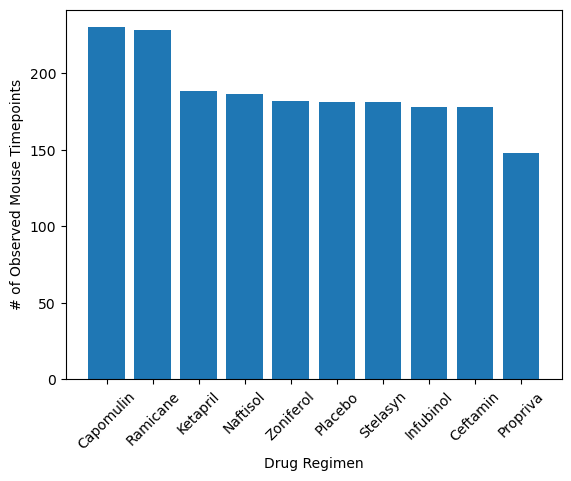

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = df['Drug Regimen'].value_counts()

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.bar(counts.index,counts.values)
plt.xticks(rotation=45)

Text(0, 0.5, 'Sex')

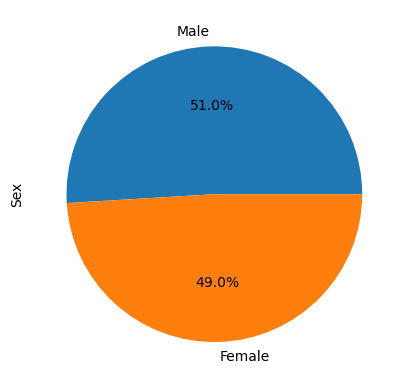

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df["Sex"].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.xlabel("")
plt.ylabel("Sex")

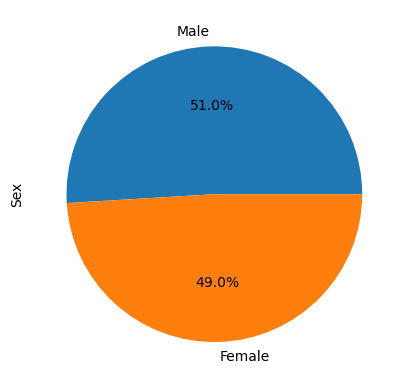

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = df["Sex"].value_counts()

plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.xlabel("")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
df_grp2 = df.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max()
df2 = pd.DataFrame(df_grp2)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(df,df2, on = ["Mouse ID","Drug Regimen","Timepoint"],how='inner')
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,45,22.050126,1,Ramicane,Male,21,16
1,s185,45,23.343598,1,Capomulin,Female,3,17
2,x401,45,28.484033,0,Capomulin,Female,16,15
3,m601,45,28.430964,1,Capomulin,Male,22,17
4,g791,45,29.128472,1,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treats = ['Capomulin','Ramicane','Infubinol','Ceftamin']
treats
# Create empty list to fill with tumor vol data (for plotting)

vol_data = []
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# for treat in treats: 
for treat in treats: 
    sub_df = tumor_df[tumor_df["Drug Regimen"] == treat]
    tumor_vol = sub_df["Tumor Volume (mm3)"]
    vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    pot_outliers = sub_df[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treat}'s potential outliers:pot_outliers: {pot_outliers['Tumor Volume (mm3)']}")




Capomulin's potential outliers:pot_outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:pot_outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:pot_outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:pot_outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Funal Tumor Volume (mm3)')

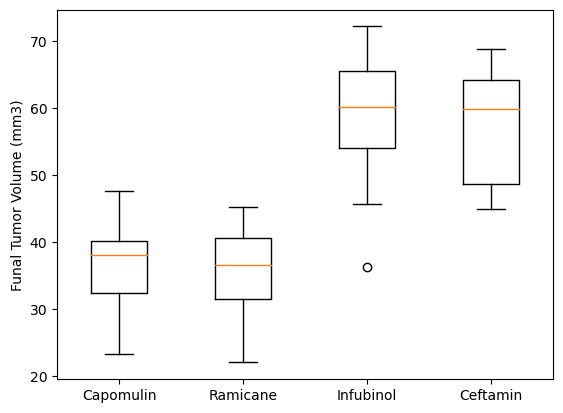

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(vol_data,labels=treats)
plt.ylabel("Funal Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 1.0, 'Data for Mouse j119')

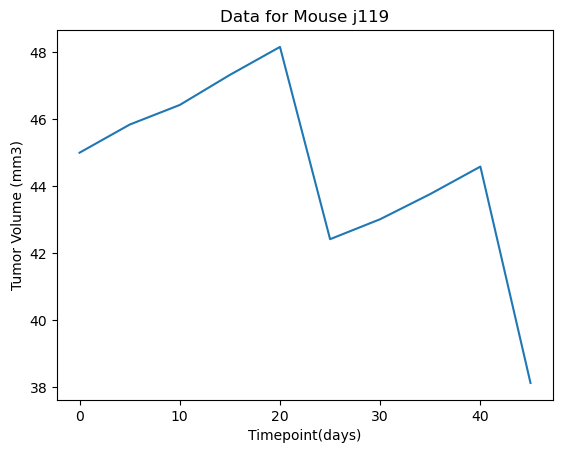

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse = df[df["Drug Regimen"] == "Capomulin"].sample(n=1)
mouse = mouse["Mouse ID"].astype('str').tolist()[0]

mouse_data  = df[df["Mouse ID"] == mouse]
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint(days)")
plt.title(f"Data for Mouse {mouse}")

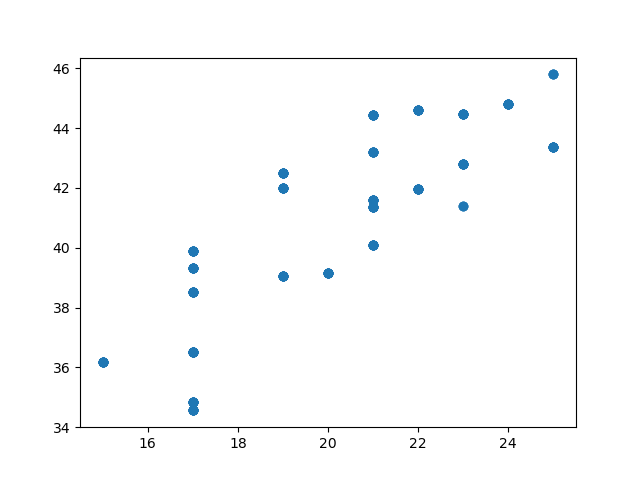

In [18]:

%matplotlib ipympl

df3 = df[df["Drug Regimen"] == "Capomulin"]

df3_grp = df3.groupby("Mouse ID")
mouse_averages = pd.DataFrame(df3_grp["Tumor Volume (mm3)"].mean())
mouse_averages = mouse_averages.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume"})
df3 = pd.merge(mouse_averages,df3,on= "Mouse ID",how = 'left')

plt.scatter(df3["Weight (g)"], df3["Avg Tumor Volume"])

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = pearsonr(df3["Weight (g)"], df3["Avg Tumor Volume"])
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient[0].round(3)}")
plt.scatter(df3["Weight (g)"], df3["Avg Tumor Volume"])
slope, intercept, r_value, p_value, std_err = linregress(df3["Weight (g)"], df3["Avg Tumor Volume"])
forecast = slope * df3["Weight (g)"] + intercept


plt.plot(df3["Weight (g)"], forecast, color='r', label="Linear Regression Line")



The correlation between mouse weight and the average tumor volume is 0.834
